In [266]:
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.under_sampling import TomekLinks, CondensedNearestNeighbour
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
import lightgbm as lgb
from sklearn.pipeline import make_pipeline

In [2]:
df = pd.read_csv('C:/Users/lemes/OneDrive/Рабочий стол/dz/auction.csv')
df

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
0,0,0,2,1,59,1,0,False,163.316667
1,0,0,2,1,59,2,0,False,200.860000
2,0,0,2,1,59,4,0,False,154.888889
3,0,0,2,1,59,6,0,False,108.640000
4,0,0,2,1,60,1,0,True,85.466667
...,...,...,...,...,...,...,...,...,...
2038,2,3,2,1,90,5,0,True,82.425000
2039,2,3,2,1,90,5,1,True,1316.983333
2040,2,3,2,1,90,5,2,False,9365.450000
2041,2,3,2,1,90,5,3,False,8474.025000


In [3]:
df.isna().describe()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
count,2043,2043,2043,2043,2043,2043,2043,2043,2043
unique,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False
freq,2043,2043,2043,2043,2043,2043,2043,2043,2043


In [4]:
df.describe()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.time
count,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000
mean,1.000000,2.093979,1.883994,0.587861,71.473324,3.252080,0.455213,7336.944574
std,0.816696,0.811269,0.320310,0.492340,8.048740,1.804225,1.062828,10375.393650
min,0.000000,0.000000,1.000000,0.000000,59.000000,1.000000,0.000000,77.916667
25%,0.000000,1.000000,2.000000,0.000000,65.000000,2.000000,0.000000,546.818910
50%,1.000000,2.000000,2.000000,1.000000,70.000000,3.000000,0.000000,1316.983333
75%,2.000000,3.000000,2.000000,1.000000,78.000000,5.000000,0.000000,10876.638889
max,2.000000,3.000000,2.000000,1.000000,90.000000,6.000000,4.000000,44130.520833


In [5]:
columns = df.columns
columns

Index(['process.b1.capacity', 'process.b2.capacity', 'process.b3.capacity',
       'process.b4.capacity', 'property.price', 'property.product',
       'property.winner', 'verification.result', 'verification.time'],
      dtype='object')

In [6]:
for i in range(0,len(columns)):
    print(df[columns[i]].unique())

[0 1 2]
[0 1 2 3]
[2 1]
[1 0]
[59 60 69 70 61 62 63 64 65 66 67 68 71 72 73 74 75 76 77 78 79 80 81 82
 83 84 85 86 87 88 89 90]
[1 2 4 6 3 5]
[0 3 4 2 1]
[False  True]
[ 163.31666667  200.86        154.88888889 ... 9365.45       8474.025
   82.00833333]


<Axes: >

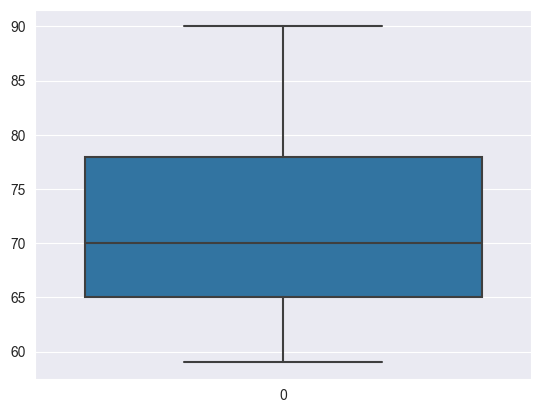

In [7]:
sns.boxplot(df['property.price'])

C:\Users\lemes\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


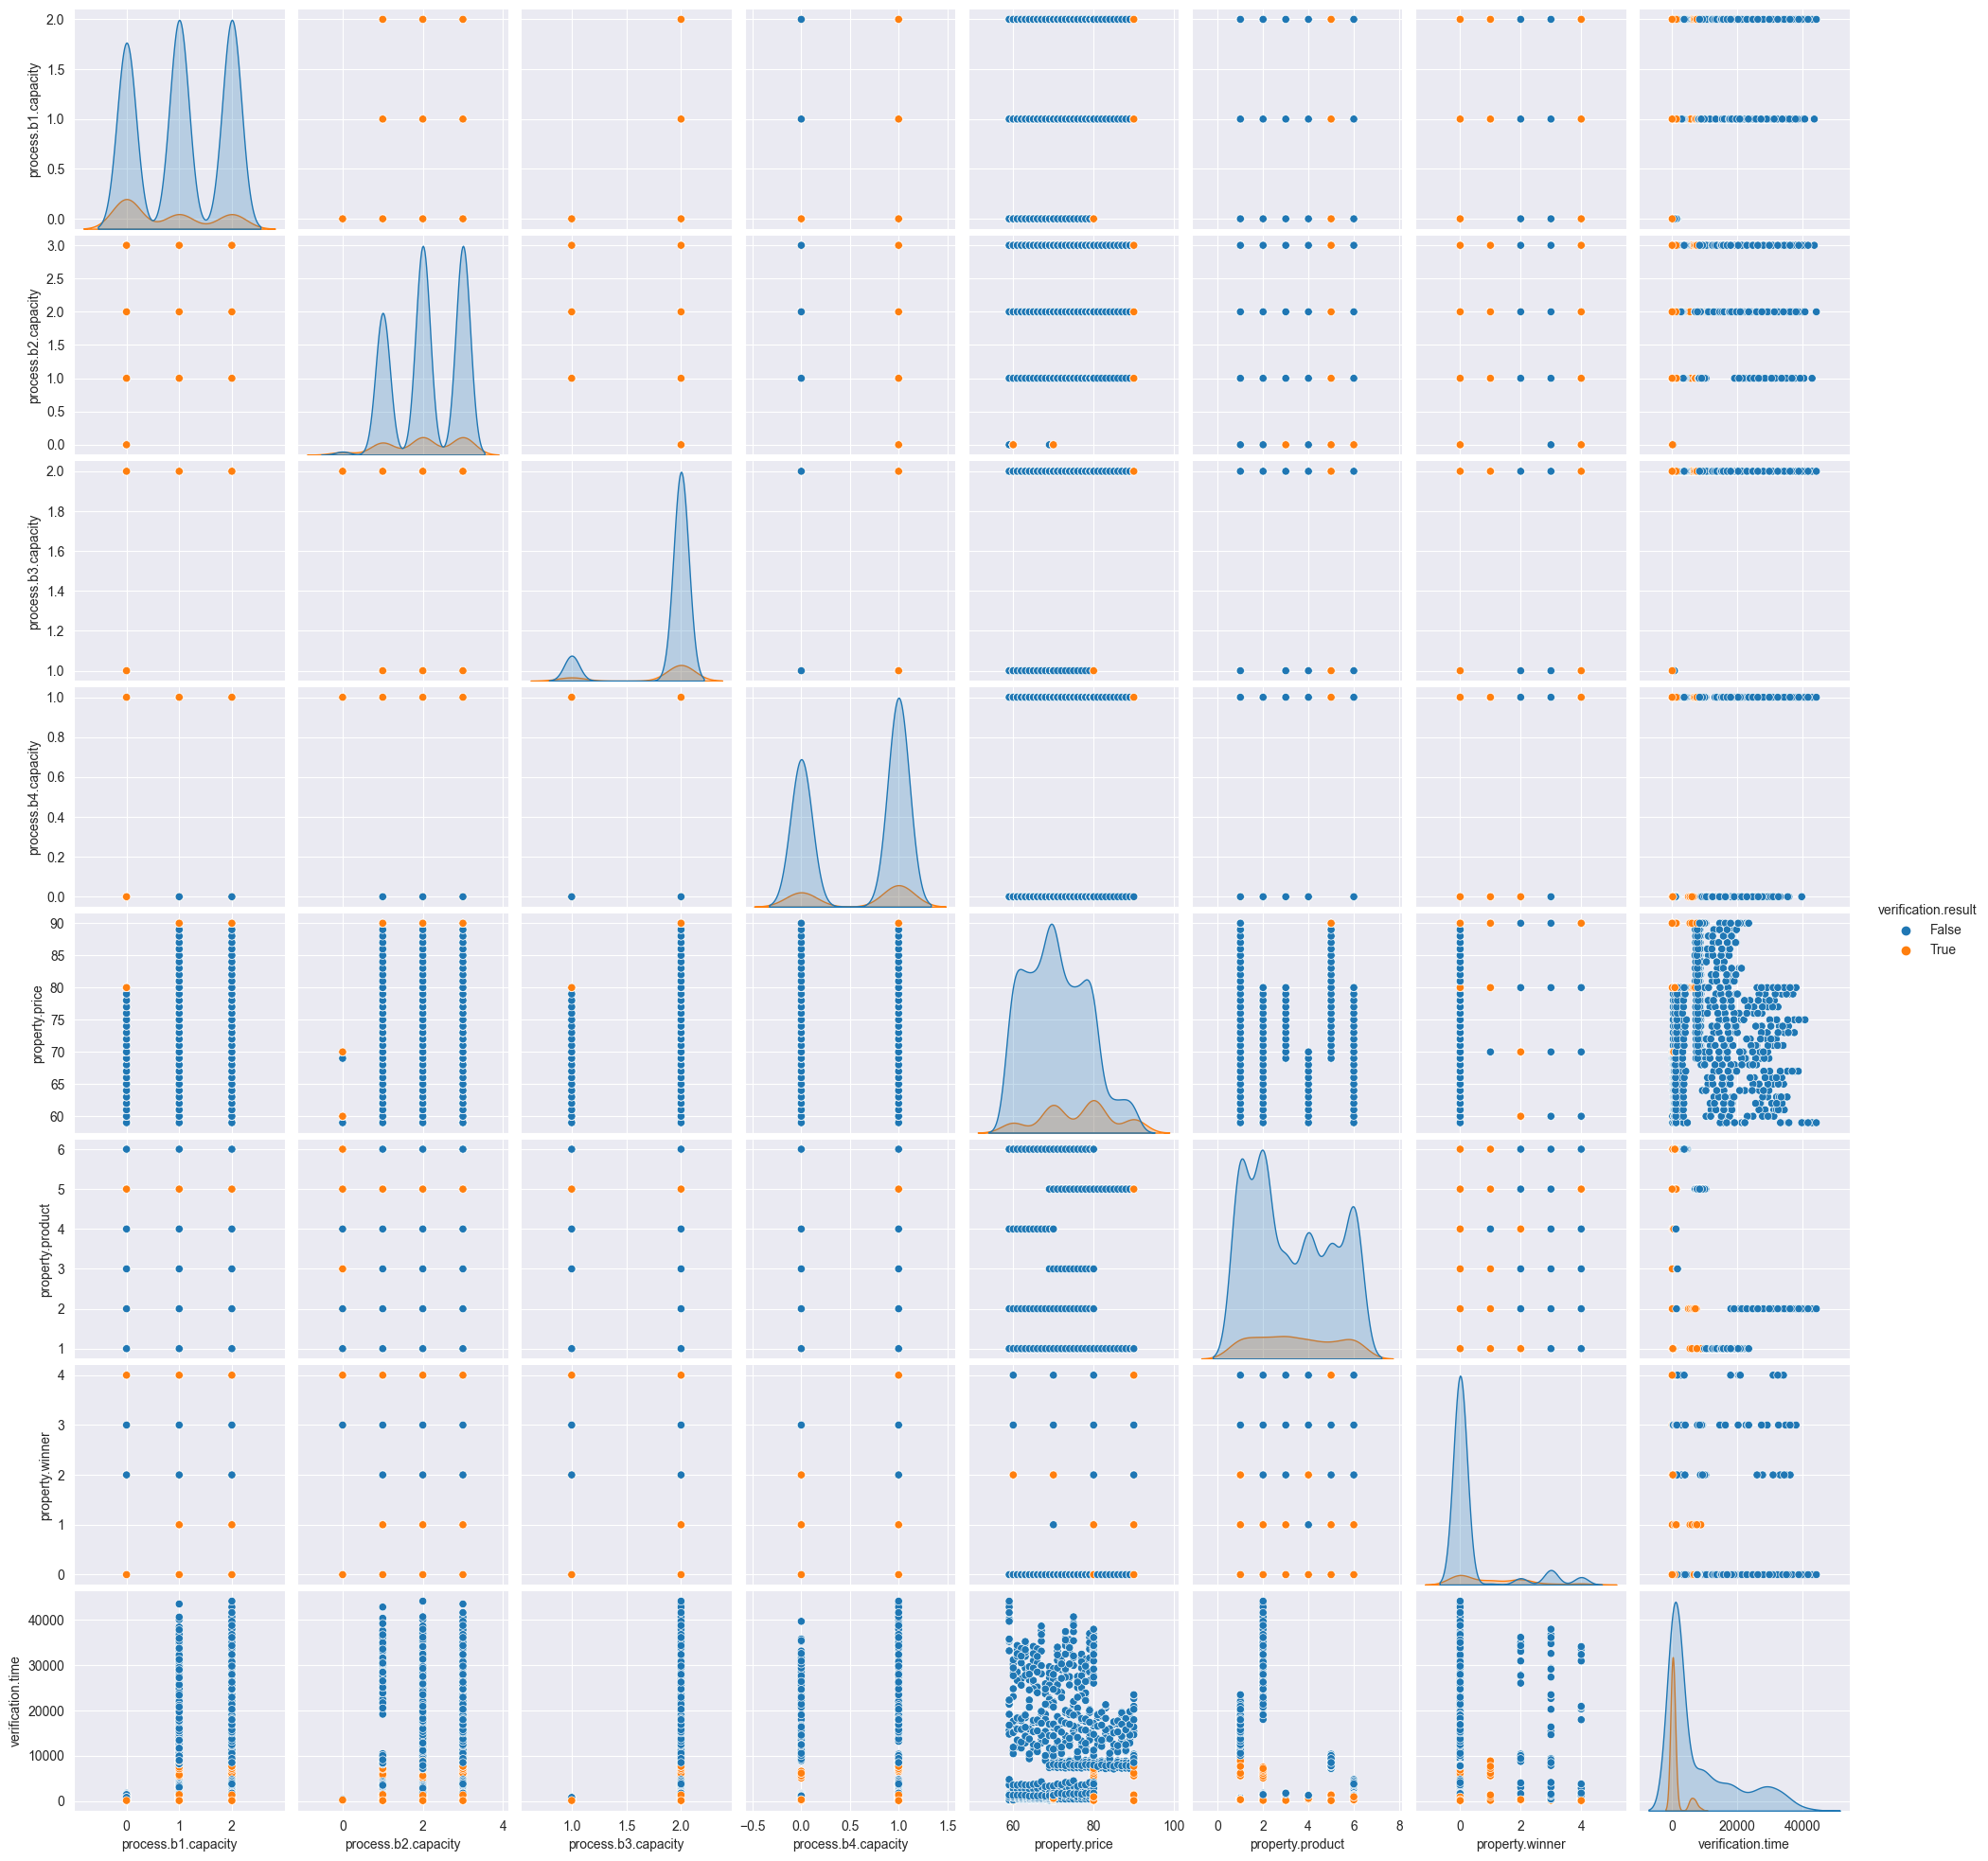

In [8]:
sns.pairplot(df, hue='verification.result')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   process.b1.capacity  2043 non-null   int64  
 1   process.b2.capacity  2043 non-null   int64  
 2   process.b3.capacity  2043 non-null   int64  
 3   process.b4.capacity  2043 non-null   int64  
 4   property.price       2043 non-null   int64  
 5   property.product     2043 non-null   int64  
 6   property.winner      2043 non-null   int64  
 7   verification.result  2043 non-null   bool   
 8   verification.time    2043 non-null   float64
dtypes: bool(1), float64(1), int64(7)
memory usage: 129.8 KB


In [10]:
laebl_encode = LabelEncoder().fit_transform(df['verification.result'])
df['verification.result'] = laebl_encode
df

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
0,0,0,2,1,59,1,0,0,163.316667
1,0,0,2,1,59,2,0,0,200.860000
2,0,0,2,1,59,4,0,0,154.888889
3,0,0,2,1,59,6,0,0,108.640000
4,0,0,2,1,60,1,0,1,85.466667
...,...,...,...,...,...,...,...,...,...
2038,2,3,2,1,90,5,0,1,82.425000
2039,2,3,2,1,90,5,1,1,1316.983333
2040,2,3,2,1,90,5,2,0,9365.450000
2041,2,3,2,1,90,5,3,0,8474.025000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   process.b1.capacity  2043 non-null   int64  
 1   process.b2.capacity  2043 non-null   int64  
 2   process.b3.capacity  2043 non-null   int64  
 3   process.b4.capacity  2043 non-null   int64  
 4   property.price       2043 non-null   int64  
 5   property.product     2043 non-null   int64  
 6   property.winner      2043 non-null   int64  
 7   verification.result  2043 non-null   int64  
 8   verification.time    2043 non-null   float64
dtypes: float64(1), int64(8)
memory usage: 143.8 KB


In [12]:
df.groupby('verification.result').count()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.time
verification.result,,,,,,,,
0,1781,1781,1781,1781,1781,1781,1781,1781
1,262,262,262,262,262,262,262,262


In [13]:
# Бачимо дисбаланс классів

In [14]:
balanced_df = df.copy()

In [15]:
cnn = CondensedNearestNeighbour()
new_df, new_df_target = cnn.fit_resample(balanced_df, balanced_df['verification.result'])
new_df.groupby('verification.result').count()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.time
verification.result,,,,,,,,
0,164,164,164,164,164,164,164,164
1,262,262,262,262,262,262,262,262


In [16]:
tokmek = TomekLinks(sampling_strategy='all')
new_df, new_df_target = tokmek.fit_resample(new_df, new_df['verification.result'])

In [17]:
new_df

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
0,2,3,2,1,70,3,0,0,1696.575000
1,0,0,2,1,59,1,0,0,163.316667
2,0,0,2,1,59,2,0,0,200.860000
3,0,0,2,1,59,6,0,0,108.640000
4,0,0,2,1,60,4,4,0,144.694444
...,...,...,...,...,...,...,...,...,...
343,2,3,2,1,80,6,0,1,879.675000
344,2,3,2,1,90,1,0,1,279.650000
345,2,3,2,1,90,1,2,1,290.650000
346,2,3,2,1,90,5,0,1,82.425000


In [18]:
new_df.groupby('verification.result').count()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.time
verification.result,,,,,,,,
0,125,125,125,125,125,125,125,125
1,223,223,223,223,223,223,223,223


C:\Users\lemes\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


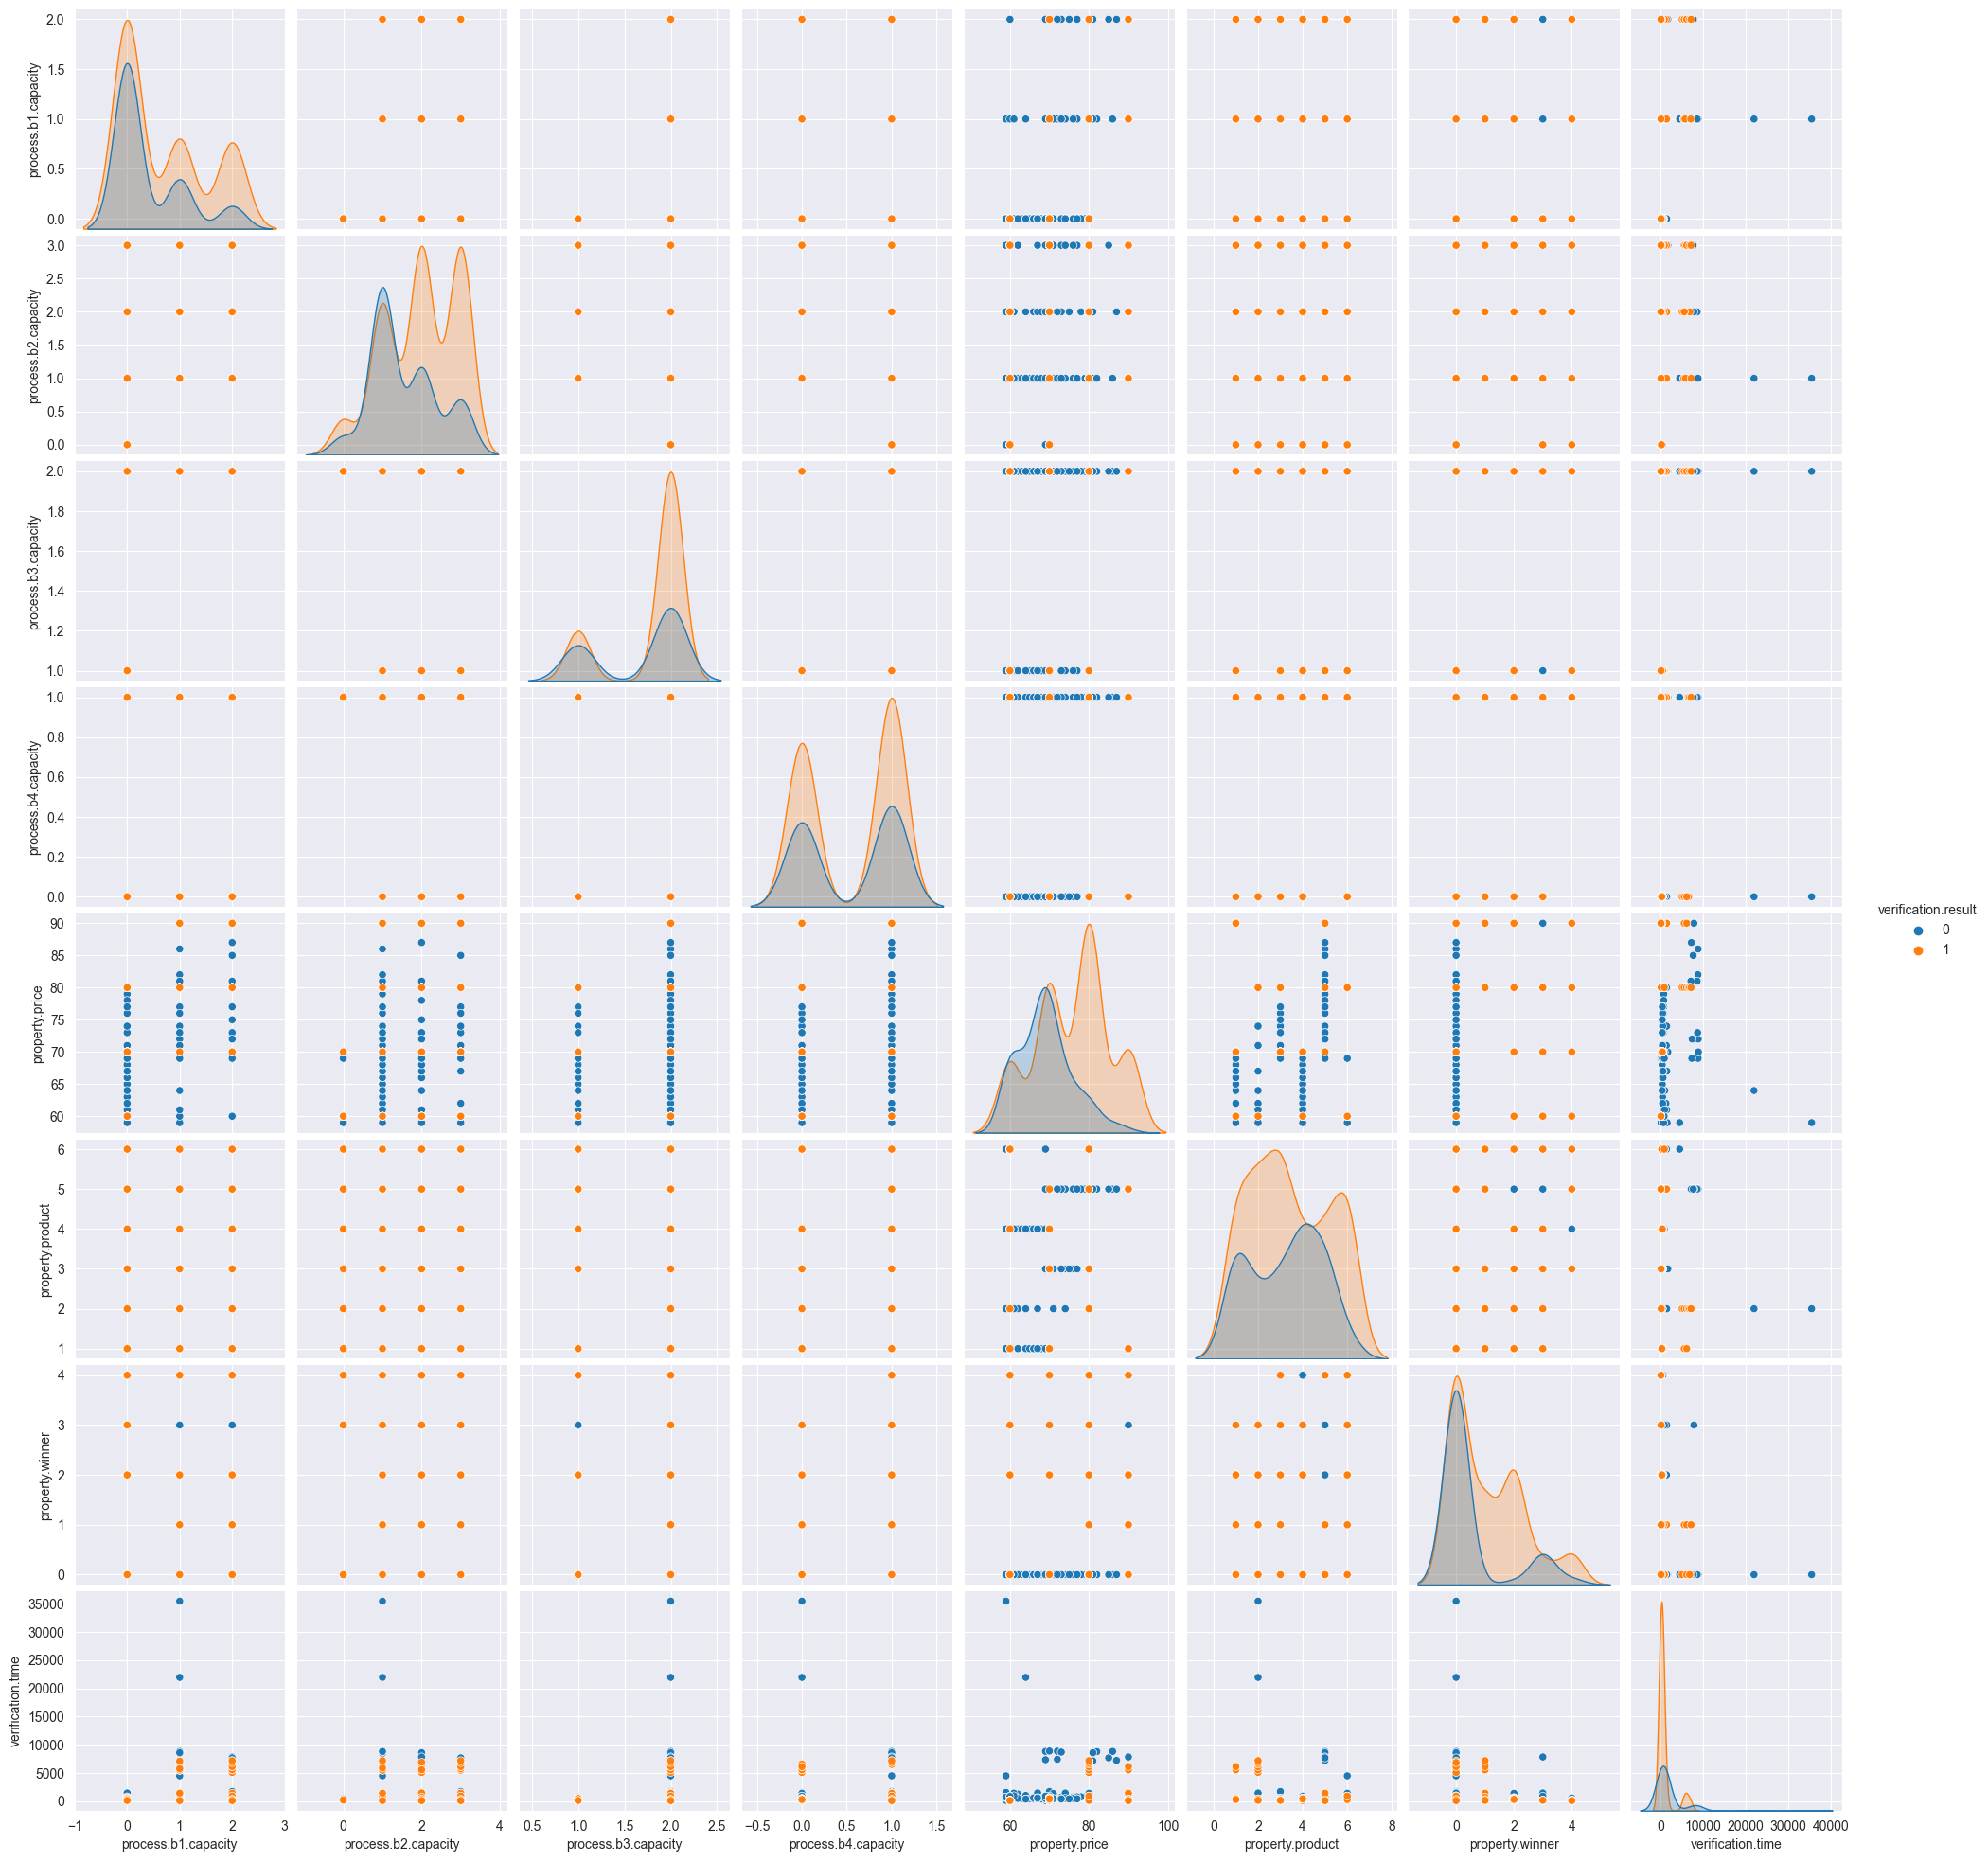

In [19]:
sns.pairplot(new_df, hue='verification.result')

In [23]:
merge_df = df.merge(new_df, how='left', indicator=True)

In [31]:
# зробимо із цього наву валідаційну виборку
valid_df = merge_df.query('_merge == "left_only"')
valid_df.drop('_merge', axis=1, inplace=True)

C:\Users\lemes\AppData\Local\Temp\ipykernel_10924\3458883113.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df.drop('_merge', axis=1, inplace=True)


In [32]:
valid_df

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
2,0,0,2,1,59,4,0,0,154.888889
6,0,0,2,1,60,1,4,0,154.250000
9,0,0,2,1,60,2,4,0,197.010000
21,0,0,2,1,70,5,0,1,194.438889
24,0,1,1,1,59,1,0,0,646.675000
...,...,...,...,...,...,...,...,...,...
2036,2,3,2,1,90,1,3,0,20243.150000
2037,2,3,2,1,90,1,4,0,17944.716667
2039,2,3,2,1,90,5,1,1,1316.983333
2040,2,3,2,1,90,5,2,0,9365.450000


In [33]:
test_df = merge_df.query('_merge == "both"')
test_df.drop('_merge', axis=1, inplace=True)
test_df

C:\Users\lemes\AppData\Local\Temp\ipykernel_10924\3093905925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop('_merge', axis=1, inplace=True)


,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
0,0,0,2,1,59,1,0,0,163.316667
1,0,0,2,1,59,2,0,0,200.860000
3,0,0,2,1,59,6,0,0,108.640000
4,0,0,2,1,60,1,0,1,85.466667
5,0,0,2,1,60,1,3,1,82.000000
...,...,...,...,...,...,...,...,...,...
2024,2,3,2,1,85,5,0,0,7660.591667
2033,2,3,2,1,90,1,0,1,279.650000
2035,2,3,2,1,90,1,2,1,290.650000
2038,2,3,2,1,90,5,0,1,82.425000


Оскільки я не дуже розумію значення фіч зробимо 2 підходи
1) не маштабування
2) максимальне маштабування фіч
і подивимось якій підхід спарював краще

In [194]:
max_df = test_df.copy()
target_max_df = max_df['verification.result']
max_df.drop('verification.result', axis=1, inplace=True)

In [195]:
new_fic = PolynomialFeatures(degree=3).fit_transform(max_df)
new_fic = pd.DataFrame(new_fic)
new_fic.isna().describe()

,0,1,2,3,4,5,6,7,8,9,...,155,156,157,158,159,160,161,162,163,164
count,348,348,348,348,348,348,348,348,348,348,...,348,348,348,348,348,348,348,348,348,348
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,348,348,348,348,348,348,348,348,348,348,...,348,348,348,348,348,348,348,348,348,348


In [196]:
max_df = max_df.reset_index(drop=True)
new_fic = new_fic.reset_index(drop=True)
max_df = max_df.join(new_fic)
max_df.isna().describe()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.time,0,1,...,155,156,157,158,159,160,161,162,163,164
count,348,348,348,348,348,348,348,348,348,348,...,348,348,348,348,348,348,348,348,348,348
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,348,348,348,348,348,348,348,348,348,348,...,348,348,348,348,348,348,348,348,348,348


In [197]:
max_df['target'] = target_max_df.reset_index(drop=True)
max_df = max_df.rename(columns=lambda x: str(x))
max_df

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.time,0,1,...,156,157,158,159,160,161,162,163,164,target
0,0,0,2,1,59,1,0,163.316667,1.0,0.0,...,0.0,163.316667,0.0,0.000000,2.667233e+04,0.0,0.000000,0.000000,4.356037e+06,0
1,0,0,2,1,59,2,0,200.860000,1.0,0.0,...,0.0,803.440000,0.0,0.000000,8.068948e+04,0.0,0.000000,0.000000,8.103644e+06,0
2,0,0,2,1,59,6,0,108.640000,1.0,0.0,...,0.0,3911.040000,0.0,0.000000,7.081590e+04,0.0,0.000000,0.000000,1.282240e+06,0
3,0,0,2,1,60,1,0,85.466667,1.0,0.0,...,0.0,85.466667,0.0,0.000000,7.304551e+03,0.0,0.000000,0.000000,6.242956e+05,1
4,0,0,2,1,60,1,3,82.000000,1.0,0.0,...,3.0,82.000000,9.0,246.000000,6.724000e+03,27.0,738.000000,20172.000000,5.513680e+05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2,3,2,1,85,5,0,7660.591667,1.0,2.0,...,0.0,191514.791667,0.0,0.000000,2.934233e+08,0.0,0.000000,0.000000,4.495593e+11,0
344,2,3,2,1,90,1,0,279.650000,1.0,2.0,...,0.0,279.650000,0.0,0.000000,7.820412e+04,0.0,0.000000,0.000000,2.186978e+07,1
345,2,3,2,1,90,1,2,290.650000,1.0,2.0,...,2.0,290.650000,4.0,581.300000,8.447742e+04,8.0,1162.600000,168954.845000,2.455336e+07,1
346,2,3,2,1,90,5,0,82.425000,1.0,2.0,...,0.0,2060.625000,0.0,0.000000,3.396940e+04,0.0,0.000000,0.000000,5.599856e+05,1


In [198]:
standart_df = test_df.copy()
standart_df = standart_df.rename(columns={'verification.result':'target'})

In [199]:
def slice(dataframe):
    train, test = train_test_split(dataframe, test_size=0.6, stratify=dataframe['target'])
    train_target = train['target']
    train.drop('target', axis=1, inplace=True)
    test_target = test['target']
    test.drop('target', axis=1, inplace=True)
    return train, train_target, test, test_target    

In [200]:
trainmax, tragettrainmax, testmax, targettestmax = slice(max_df)
train, targettrain, test, targettest = slice(standart_df)

перейдемо до побудови моделей

In [304]:
def model(text, models, train_df, target_train, test_df, target_test, numb_estimator=100, depth=None, weight=None, lgb_depth=31, neighbors=5):
    msg = f'Модель відпрацювала з данними {text}'
    if models == lgb:
        train_data = lgb.Dataset(train_df, label=target_train)
        model = lgb.train(params={'objective':'binary', 'num_leaves':lgb_depth}, train_set=train_data) 
        pred = model.predict(train_df)
        prediction1 = (pred > 0.5).astype(int)
        pred = model.predict(test_df)
        prediciton2 = (pred > 0.5).astype(int)
    elif models == StackingClassifier:
        estimator=[
            ('rf', RandomForestClassifier(n_estimators=numb_estimator, max_depth=depth, random_state=13)),
            ('lgr', make_pipeline(StandardScaler(), LogisticRegression(random_state=13))),
            ('knn', make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=neighbors))),
            ('nc', make_pipeline(StandardScaler(), NearestCentroid()))
        ]
        model = models(estimators=estimator, final_estimator=LogisticRegression())
        model = model.fit(train_df, target_train)
        prediction1 = model.predict(train_df)
    else:
        model = models(n_estimators=numb_estimator, max_depth=depth, class_weight=weight,random_state=13)
        model = model.fit(train_df,target_train)
        prediction1 = model.predict(train_df)
    accuracy_train = accuracy_score(target_train, prediction1)
    precision_train = precision_score(target_train, prediction1, average='micro')
    recall_train = recall_score(target_train, prediction1, average='micro')
    f1_train = f1_score(target_train, prediction1, average='micro')
    msg += f'\n\nНа навчальній виборці маємо такі показники\naccuracy : {accuracy_train}\nprecision : {precision_train}\nrecall : {recall_train}\nf1 score : {f1_train}'
    if models != lgb:
        prediciton2 = model.predict(test_df)    
    accuracy_test = accuracy_score(target_test, prediciton2)
    precision_test = precision_score(target_test, prediciton2, average='micro')
    recall_test = recall_score(target_test, prediciton2, average='micro')
    f1_test = f1_score(target_test, prediciton2, average='micro')
    msg += f'\n\nНа тестовій виборці маємо такі показники\naccuracy : {accuracy_test}\nprecision : {precision_test}\nrecall : {recall_test}\nf1 score : {f1_test}'
    inf = {'msg':msg, 'prediction_test':prediciton2, 'accuracy':accuracy_test, 'precision':precision_test, 'recall':recall_test, 'f1':f1_test}
    return inf

In [202]:
proba = model(text='На масштабованних данних', models=RandomForestClassifier, train_df=trainmax, target_train=tragettrainmax, test_df=testmax, target_test=targettestmax)

In [203]:
print(proba['msg'])

Модель відпрацювала з данними На масштабованних данних

На навчальній виборці маємо такі показники
accuracy : 1.0
precision : 1.0
recall : 1.0
f1 score : 1.0

На тестовій виборці маємо такі показники
accuracy : 0.8947368421052632
precision : 0.8947368421052632
recall : 0.8947368421052632
f1 score : 0.8947368421052632


In [204]:
#реалізуємо вінтрішню стрижку дерев

In [205]:
acc = []
acc_dep =[]
for i in range(1,40):
    tree = model(text='На масштабованних данних', models=RandomForestClassifier, train_df=trainmax, target_train=tragettrainmax, test_df=testmax, target_test=targettestmax, depth=i)
    acc.append(tree['accuracy'])
    acc_dep.append([tree['accuracy'], i])

In [207]:
acc_dep[acc.index(max(acc))]

[0.9043062200956937, 7]

In [208]:
proba_param1 = model(text='На масштабованних данних', models=RandomForestClassifier, train_df=trainmax, target_train=tragettrainmax, test_df=testmax, target_test=targettestmax, depth=7)

In [209]:
print(proba_param1['msg'])

Модель відпрацювала з данними На масштабованних данних

На навчальній виборці маємо такі показники
accuracy : 1.0
precision : 1.0
recall : 1.0
f1 score : 1.0

На тестовій виборці маємо такі показники
accuracy : 0.9043062200956937
precision : 0.9043062200956937
recall : 0.9043062200956937
f1 score : 0.9043062200956937


In [243]:
# реалізуємо зовнішню стрижку вирубку дерев :)
acc = []
acc_dep =[]
for i in range(1,300):
    tree = model(text='На масштабованних данних', models=RandomForestClassifier, train_df=trainmax, target_train=tragettrainmax, test_df=testmax, target_test=targettestmax, depth=7, numb_estimator=i)
    acc.append(tree['accuracy'])
    acc_dep.append([tree['accuracy'], i])

In [244]:
acc_dep[acc.index(max(acc))]

[0.9138755980861244, 25]

In [212]:
acc_dep

[[0.8086124401913876, 1],
 [0.8133971291866029, 2],
 [0.8660287081339713, 3],
 [0.861244019138756, 4],
 [0.8851674641148325, 5],
 [0.8803827751196173, 6],
 [0.8995215311004785, 7],
 [0.8803827751196173, 8],
 [0.8899521531100478, 9],
 [0.8803827751196173, 10],
 [0.8899521531100478, 11],
 [0.8851674641148325, 12],
 [0.8899521531100478, 13],
 [0.8947368421052632, 14],
 [0.8995215311004785, 15],
 [0.8947368421052632, 16],
 [0.8995215311004785, 17],
 [0.8947368421052632, 18],
 [0.8995215311004785, 19],
 [0.8995215311004785, 20],
 [0.8995215311004785, 21],
 [0.8995215311004785, 22],
 [0.8995215311004785, 23],
 [0.9043062200956937, 24],
 [0.9043062200956937, 25],
 [0.8995215311004785, 26],
 [0.8947368421052632, 27],
 [0.8995215311004785, 28],
 [0.8995215311004785, 29],
 [0.8947368421052632, 30],
 [0.8947368421052632, 31],
 [0.8947368421052632, 32],
 [0.8899521531100478, 33],
 [0.8947368421052632, 34],
 [0.8899521531100478, 35],
 [0.8947368421052632, 36],
 [0.8899521531100478, 37],
 [0.8899521

In [247]:
randomforest_param = model(text='На масштабованних данних', models=RandomForestClassifier, train_df=trainmax, target_train=tragettrainmax, test_df=testmax, target_test=targettestmax, depth=7, numb_estimator=25)

In [248]:
print(randomforest_param['msg'])

Модель відпрацювала з данними На масштабованних данних

На навчальній виборці маємо такі показники
accuracy : 1.0
precision : 1.0
recall : 1.0
f1 score : 1.0

На тестовій виборці маємо такі показники
accuracy : 0.9138755980861244
precision : 0.9138755980861244
recall : 0.9138755980861244
f1 score : 0.9138755980861244


In [251]:
# будемо використовувати Lgb - бо CatBoost як звично у росіян "аналогов нєт" а насправді  💩
proba_lgb = model(text='На масштабованних данних', models=lgb, train_df=trainmax, target_train=tragettrainmax, test_df=testmax, target_test=targettestmax)

[LightGBM] [Info] Number of positive: 89, number of negative: 50
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2668
[LightGBM] [Info] Number of data points in the train set: 139, number of used features: 171
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.640288 -> initscore=0.576613
[LightGBM] [Info] Start training from score 0.576613
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [252]:
print(proba_lgb['msg'])

Модель відпрацювала з данними На масштабованних данних

На навчальній виборці маємо такі показники
accuracy : 1.0
precision : 1.0
recall : 1.0
f1 score : 1.0

На тестовій виборці маємо такі показники
accuracy : 0.9234449760765551
precision : 0.9234449760765551
recall : 0.9234449760765551
f1 score : 0.9234449760765551


In [254]:
#Подивимось чи діє тут стрижка
acc = []
acc_dep =[]
for i in range(2,100):
    tree = model(text='На масштабованних данних', models=lgb, train_df=trainmax, target_train=tragettrainmax, test_df=testmax, target_test=targettestmax, lgb_depth=i)
    acc.append(tree['accuracy'])
    acc_dep.append([tree['accuracy'], i])

[LightGBM] [Info] Number of positive: 89, number of negative: 50
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000752 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2668
[LightGBM] [Info] Number of data points in the train set: 139, number of used features: 171
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.640288 -> initscore=0.576613
[LightGBM] [Info] Start training from score 0.576613
[LightGBM] [Info] Number of positive: 89, number of negative: 50
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000779 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2668
[LightGBM] [Info] Number of data points in the train set: 139, number of used features: 171
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.640288 -> initscore=0.576613
[LightGBM] [Info] S

In [255]:
acc_dep[acc.index(max(acc))]

[0.9282296650717703, 4]

In [256]:
lgb_param = model(text='На масштабованних данних', models=lgb, train_df=trainmax, target_train=tragettrainmax, test_df=testmax, target_test=targettestmax, lgb_depth=4)

[LightGBM] [Info] Number of positive: 89, number of negative: 50
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2668
[LightGBM] [Info] Number of data points in the train set: 139, number of used features: 171
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.640288 -> initscore=0.576613
[LightGBM] [Info] Start training from score 0.576613


In [257]:
print(lgb_param['msg'])

Модель відпрацювала з данними На масштабованних данних

На навчальній виборці маємо такі показники
accuracy : 1.0
precision : 1.0
recall : 1.0
f1 score : 1.0

На тестовій виборці маємо такі показники
accuracy : 0.9282296650717703
precision : 0.9282296650717703
recall : 0.9282296650717703
f1 score : 0.9282296650717703


In [269]:
proba3 = model(text='На масштабованних данних', models=StackingClassifier, train_df=trainmax, target_train=tragettrainmax, test_df=testmax, target_test=targettestmax)

In [270]:
print(proba3['msg'])

Модель відпрацювала з данними На масштабованних данних

На навчальній виборці маємо такі показники
accuracy : 1.0
precision : 1.0
recall : 1.0
f1 score : 1.0

На тестовій виборці маємо такі показники
accuracy : 0.8708133971291866
precision : 0.8708133971291866
recall : 0.8708133971291866
f1 score : 0.8708133971291866


In [273]:
acc = []
acc_dep = []
for i in range(1, 20):
    tree = model(text='На масштабованних данних', models=StackingClassifier, train_df=trainmax, target_train=tragettrainmax, test_df=testmax, target_test=targettestmax, depth=7, numb_estimator=25, neighbors=i)
    acc.append(tree['accuracy'])
    acc_dep.append([tree['accuracy'], i])

In [274]:
acc_dep[acc.index(max(acc))]

[0.8803827751196173, 13]

In [275]:
stakin_param = model(text='На масштабованних данних', models=StackingClassifier, train_df=trainmax, target_train=tragettrainmax, test_df=testmax, target_test=targettestmax, depth=7, numb_estimator=25, neighbors=13)

In [276]:
print(stakin_param['msg'])

Модель відпрацювала з данними На масштабованних данних

На навчальній виборці маємо такі показники
accuracy : 1.0
precision : 1.0
recall : 1.0
f1 score : 1.0

На тестовій виборці маємо такі показники
accuracy : 0.8803827751196173
precision : 0.8803827751196173
recall : 0.8803827751196173
f1 score : 0.8803827751196173


In [278]:
valid_target = valid_df['verification.result']
valid_df.drop('verification.result', axis=1, inplace=True)

C:\Users\lemes\AppData\Local\Temp\ipykernel_10924\3492723889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df.drop('verification.result', axis=1, inplace=True)


In [281]:
new_validfic = PolynomialFeatures(degree=3).fit_transform(valid_df)

In [282]:
new_validfic = pd.DataFrame(new_validfic)
new_validfic.isna().describe()

,0,1,2,3,4,5,6,7,8,9,...,155,156,157,158,159,160,161,162,163,164
count,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695,...,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695,...,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695


In [286]:
valid_model_df = valid_df.reset_index(drop=True)
new_validfic = new_validfic.reset_index(drop=True)
valid_model_df = valid_model_df.join(new_validfic)
valid_model_df.isna().describe()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.time,0,1,...,155,156,157,158,159,160,161,162,163,164
count,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695,...,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695,...,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695


In [288]:
valid_model_df = valid_model_df.rename(columns=lambda x: str(x))

In [289]:
randomforest_valid = model(text='На масштабованних данних', models=RandomForestClassifier, train_df=trainmax, target_train=tragettrainmax, test_df=valid_model_df, target_test=valid_target, depth=7, numb_estimator=25)

In [290]:
print(randomforest_valid['msg'])

Модель відпрацювала з данними На масштабованних данних

На навчальній виборці маємо такі показники
accuracy : 1.0
precision : 1.0
recall : 1.0
f1 score : 1.0

На тестовій виборці маємо такі показники
accuracy : 0.8613569321533924
precision : 0.8613569321533924
recall : 0.8613569321533924
f1 score : 0.8613569321533924


In [294]:
valid_target.value_counts()

0    1656
1      39
Name: verification.result, dtype: int64

In [295]:
see_unpredict = pd.DataFrame()

In [296]:
see_unpredict['target'] = valid_target
see_unpredict['predict'] = randomforest_valid['prediction_test']
see_unpredict['True_False'] = see_unpredict['target']==see_unpredict['predict']

In [298]:
see_unpredict.query('True_False == False and target == 1')

,target,predict,True_False
61,1,0,False
117,1,0,False
188,1,0,False
189,1,0,False


In [305]:
lgb_valid = model(text='На масштабованних данних', models=lgb, train_df=trainmax, target_train=tragettrainmax, test_df=valid_model_df, target_test=valid_target, lgb_depth=4)

[LightGBM] [Info] Number of positive: 89, number of negative: 50
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2668
[LightGBM] [Info] Number of data points in the train set: 139, number of used features: 171
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.640288 -> initscore=0.576613
[LightGBM] [Info] Start training from score 0.576613


In [306]:
print(lgb_valid['msg'])

Модель відпрацювала з данними На масштабованних данних

На навчальній виборці маємо такі показники
accuracy : 1.0
precision : 1.0
recall : 1.0
f1 score : 1.0

На тестовій виборці маємо такі показники
accuracy : 0.8743362831858407
precision : 0.8743362831858407
recall : 0.8743362831858407
f1 score : 0.8743362831858407


In [307]:
staking_valid = model(text='На масштабованних данних', models=StackingClassifier, train_df=trainmax, target_train=tragettrainmax, test_df=valid_model_df, target_test=valid_target, depth=7, numb_estimator=25, neighbors=13)

In [308]:
print(staking_valid['msg'])

Модель відпрацювала з данними На масштабованних данних

На навчальній виборці маємо такі показники
accuracy : 1.0
precision : 1.0
recall : 1.0
f1 score : 1.0

На тестовій виборці маємо такі показники
accuracy : 0.7303834808259587
precision : 0.7303834808259587
recall : 0.7303834808259587
f1 score : 0.7303834808259587


На масштабованних данних можна зробити висновок, що краще за все споралась модель LGB, але random forest теж показала гарний результат на рівні

Подивимось чи був наш фічаінженерінг корисний

In [ ]:
train, targettrain, test, targettest

In [343]:
proba10 = model(text='На не масштабованних данних', models=RandomForestClassifier, train_df=train, target_train=targettrain, test_df=test, target_test=targettest)

In [344]:
print(proba10['msg'])

Модель відпрацювала з данними На не масштабованних данних

На навчальній виборці маємо такі показники
accuracy : 1.0
precision : 1.0
recall : 1.0
f1 score : 1.0

На тестовій виборці маємо такі показники
accuracy : 0.9282296650717703
precision : 0.9282296650717703
recall : 0.9282296650717703
f1 score : 0.9282296650717703


In [316]:
acc = []
acc_dep =[]
for i in range(1,100):
    tree = model(text='На не масштабованних данних', models=RandomForestClassifier, train_df=train, target_train=targettrain, test_df=test, target_test=targettest, depth=i)
    acc.append(tree['accuracy'])
    acc_dep.append([tree['accuracy'], i])

In [317]:
acc_dep[acc.index(max(acc))]

[0.9282296650717703, 7]

In [318]:
acc = []
acc_dep =[]
for i in range(1,100):
    tree = model(text='На не масштабованних данних', models=RandomForestClassifier, train_df=train, target_train=targettrain, test_df=test, target_test=targettest, depth=7, numb_estimator=i)
    acc.append(tree['accuracy'])
    acc_dep.append([tree['accuracy'], i])

In [319]:
acc_dep[acc.index(max(acc))]

[0.9473684210526315, 30]

In [345]:
randomforest_standart = model(text='На не масштабованних данних', models=RandomForestClassifier, train_df=train, target_train=targettrain, test_df=test, target_test=targettest, depth=7, numb_estimator=30)

In [346]:
print(randomforest_standart['msg'])

Модель відпрацювала з данними На не масштабованних данних

На навчальній виборці маємо такі показники
accuracy : 1.0
precision : 1.0
recall : 1.0
f1 score : 1.0

На тестовій виборці маємо такі показники
accuracy : 0.9473684210526315
precision : 0.9473684210526315
recall : 0.9473684210526315
f1 score : 0.9473684210526315


In [347]:
proba11 = model(text='На не масштабованних данних', models=lgb, train_df=train, target_train=targettrain, test_df=test, target_test=targettest)

[LightGBM] [Info] Number of positive: 89, number of negative: 50
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 86
[LightGBM] [Info] Number of data points in the train set: 139, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.640288 -> initscore=0.576613
[LightGBM] [Info] Start training from score 0.576613
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

In [348]:
print(proba11['msg'])

Модель відпрацювала з данними На не масштабованних данних

На навчальній виборці маємо такі показники
accuracy : 1.0
precision : 1.0
recall : 1.0
f1 score : 1.0

На тестовій виборці маємо такі показники
accuracy : 0.9665071770334929
precision : 0.9665071770334929
recall : 0.9665071770334929
f1 score : 0.9665071770334929


In [324]:
acc = []
acc_dep =[]
for i in range(2,100):
    tree = model(text='На не масштабованних данних', models=lgb, train_df=train, target_train=targettrain, test_df=test, target_test=targettest, lgb_depth=i)
    acc.append(tree['accuracy'])
    acc_dep.append([tree['accuracy'], i])

[LightGBM] [Info] Number of positive: 89, number of negative: 50
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 86
[LightGBM] [Info] Number of data points in the train set: 139, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.640288 -> initscore=0.576613
[LightGBM] [Info] Start training from score 0.576613
[LightGBM] [Info] Number of positive: 89, number of negative: 50
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000473 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 86
[LightGBM] [Info] Number of data points in the train set: 139, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.640288 -> initscore=0.576613
[LightGBM] [Info] Start tra

In [325]:
acc_dep[acc.index(max(acc))]

[0.9712918660287081, 4]

In [349]:
lgb_standart = model(text='На не масштабованних данних', models=lgb, train_df=train, target_train=targettrain, test_df=test, target_test=targettest, lgb_depth=4)

[LightGBM] [Info] Number of positive: 89, number of negative: 50
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 86
[LightGBM] [Info] Number of data points in the train set: 139, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.640288 -> initscore=0.576613
[LightGBM] [Info] Start training from score 0.576613


In [350]:
print(lgb_standart['msg'])

Модель відпрацювала з данними На не масштабованних данних

На навчальній виборці маємо такі показники
accuracy : 1.0
precision : 1.0
recall : 1.0
f1 score : 1.0

На тестовій виборці маємо такі показники
accuracy : 0.9712918660287081
precision : 0.9712918660287081
recall : 0.9712918660287081
f1 score : 0.9712918660287081


In [355]:
proba12 = model(text='На не масштабованних данних', models=StackingClassifier, train_df=train, target_train=targettrain, test_df=test, target_test=targettest)

In [356]:
print(proba12['msg'])

Модель відпрацювала з данними На не масштабованних данних

На навчальній виборці маємо такі показники
accuracy : 1.0
precision : 1.0
recall : 1.0
f1 score : 1.0

На тестовій виборці маємо такі показники
accuracy : 0.8803827751196173
precision : 0.8803827751196173
recall : 0.8803827751196173
f1 score : 0.8803827751196173


In [357]:
acc = []
acc_dep = []
for i in range(1, 20):
    tree = model(text='На не масштабованних данних', models=StackingClassifier, train_df=train, target_train=targettrain, test_df=test, target_test=targettest, depth=7, numb_estimator=30, neighbors=i)
    acc.append(tree['accuracy'])
    acc_dep.append([tree['accuracy'], i])

In [358]:
acc_dep[acc.index(max(acc))]

[0.9043062200956937, 3]

In [359]:
staking_standart = model(text='На не масштабованних данних', models=StackingClassifier, train_df=train, target_train=targettrain, test_df=test, target_test=targettest, depth=7, numb_estimator=30, neighbors=3)

In [360]:
print(staking_standart['msg'])

Модель відпрацювала з данними На не масштабованних данних

На навчальній виборці маємо такі показники
accuracy : 0.9928057553956835
precision : 0.9928057553956835
recall : 0.9928057553956835
f1 score : 0.9928057553956835

На тестовій виборці маємо такі показники
accuracy : 0.9043062200956937
precision : 0.9043062200956937
recall : 0.9043062200956937
f1 score : 0.9043062200956937


In [334]:
valid_df

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.time
2,0,0,2,1,59,4,0,154.888889
6,0,0,2,1,60,1,4,154.250000
9,0,0,2,1,60,2,4,197.010000
21,0,0,2,1,70,5,0,194.438889
24,0,1,1,1,59,1,0,646.675000
...,...,...,...,...,...,...,...,...
2036,2,3,2,1,90,1,3,20243.150000
2037,2,3,2,1,90,1,4,17944.716667
2039,2,3,2,1,90,5,1,1316.983333
2040,2,3,2,1,90,5,2,9365.450000


In [335]:
valid_target

2       0
6       0
9       0
21      1
24      0
       ..
2036    0
2037    0
2039    1
2040    0
2041    0
Name: verification.result, Length: 1695, dtype: int64

In [367]:
randomforest_valid_standart = model(text='На не масштабованних данних', models=RandomForestClassifier, train_df=train, target_train=targettrain, test_df=valid_df, target_test=valid_target, depth=7, numb_estimator=30)

In [368]:
print(randomforest_valid_standart['msg'])

Модель відпрацювала з данними На не масштабованних данних

На навчальній виборці маємо такі показники
accuracy : 1.0
precision : 1.0
recall : 1.0
f1 score : 1.0

На тестовій виборці маємо такі показники
accuracy : 0.8017699115044248
precision : 0.8017699115044248
recall : 0.8017699115044248
f1 score : 0.8017699115044248


In [363]:
lgb_valid_stadart = model(text='На не масштабованних данних', models=lgb, train_df=train, target_train=targettrain, test_df=valid_df, target_test=valid_target, lgb_depth=4)

[LightGBM] [Info] Number of positive: 89, number of negative: 50
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 86
[LightGBM] [Info] Number of data points in the train set: 139, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.640288 -> initscore=0.576613
[LightGBM] [Info] Start training from score 0.576613


In [364]:
print(lgb_valid_stadart['msg'])

Модель відпрацювала з данними На не масштабованних данних

На навчальній виборці маємо такі показники
accuracy : 1.0
precision : 1.0
recall : 1.0
f1 score : 1.0

На тестовій виборці маємо такі показники
accuracy : 0.855457227138643
precision : 0.855457227138643
recall : 0.855457227138643
f1 score : 0.855457227138643


In [365]:
staking_valid_standart = model(text='На не масштабованних данних', models=StackingClassifier, train_df=train, target_train=targettrain, test_df=valid_df, target_test=valid_target, depth=7, numb_estimator=30, neighbors=3)

In [366]:
print(staking_valid_standart['msg'])

Модель відпрацювала з данними На не масштабованних данних

На навчальній виборці маємо такі показники
accuracy : 0.9928057553956835
precision : 0.9928057553956835
recall : 0.9928057553956835
f1 score : 0.9928057553956835

На тестовій виборці маємо такі показники
accuracy : 0.7056047197640118
precision : 0.7056047197640118
recall : 0.7056047197640118
f1 score : 0.7056047197640118


Висновок - профіт від маштабування фіч є. Карще за все впорались моделі LGB та рандом форест на маштабованних данних